## Pump it up-Data Mining the Water Table

### 1. Defining the Problem
Tanzania faces a major water crisis. Millions lack access to clean drinking water due to limited freshwater sources and malfunctioning water points. This lack of safe water has severe consequences, including health risks, decreased quality of life, and even death for children. The Tanzanian government is working to improve sanitation, but better water resource management is crucial for the country's future.

### 1.1Tanzania faces a critical challenge:
Millions of people lack access to safe drinking water due to malfunctioning water points. This project aims to leverage machine learning to predict the functionality of water points, helping prioritize maintenance and ensure clean water reaches communities across the country. By analyzing data on factors like pump type, installation age, location, and management practices, we can build a model to classify water points into three categories: functional, needing repair, or non-functional. This information can empower authorities to:

### 1.2Target Maintenance Efforts:
Prioritize repairs for water points most at risk of failure, ensuring efficient resource allocation and minimizing downtime. Preventative Maintenance: Identify pumps nearing the end of their lifespan or susceptible to breakdowns based on historical data, prompting proactive maintenance to avoid service disruptions.

### 1.3Improve Resource Management:
Gain insights into factors affecting water point functionality, informing strategies for pump selection, installation practices, and long-term management approaches. By harnessing the power of machine learning, we can move beyond reactive repairs and towards a proactive approach to ensuring clean water security for Tanzania's population. This project tackles the critical business problem of water scarcity by predicting water point functionality, ultimately contributing to improved public health and well-being.

### 1.4 Our project will be successful if we can accurately predict whether a water point is:¶
a. Fully Functional: The water point is operational and delivers clean water without any current repairs needed.

b. Partially Functional (Needs Repair): The water point is currently operational, but there are potential issues requiring repairs to ensure continued functionality.

c. Non-Functional: The water point is completely out of service and requires repairs to provide clean water again.

## 2.0 Importing libraries

# **2. Importing Libraries.**

In [1]:
# Install the category_encoders library (used for encoding categorical data)
!pip install category_encoders

# Upgrade the imbalanced-learn library (used for handling imbalanced datasets)
!pip install -U imbalanced-learn

# Upgrade pip itself (the package manager for Python) for the user
!pip install --upgrade pip --user

# Install the imblearn library (used for handling imbalanced datasets) for the user
!pip install imblearn --user

# Install the geopandas library (used for geospatial data analysis)
!pip install geopandas


  Attempting uninstall: joblib
    Found existing installation: joblib 0.17.0
    Uninstalling joblib-0.17.0:
      Successfully uninstalled joblib-0.17.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\Rion\\anaconda3\\envs\\learn-env\\Lib\\site-packages\\~klearn\\decomposition\\_cdnmf_fast.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
# Data Exploration and Visualization Libraries
import pandas as pd  # Powerful data manipulation and analysis toolkit
import matplotlib.pyplot as plt  # Classic plotting library for various visualizations
import seaborn as sns  # Statistical data visualization built on top of matplotlib

# Data Cleaning and Preprocessing Libraries
from sklearn.preprocessing import RobustScaler  # Handles outliers for numerical data
from sklearn.impute import SimpleImputer  # Fills missing values in data

# Machine Learning Libraries
from sklearn.datasets import make_classification  # Generates synthetic datasets
from sklearn.model_selection import train_test_split  # Splits data for training and testing
from imblearn.over_sampling import SMOTE  # Handles imbalanced datasets (optional)
from sklearn.tree import DecisionTreeClassifier  # Decision tree-based classification model (alternative to XGBoost)
from xgboost import XGBClassifier  # Gradient boosting machine for classification
from sklearn.model_selection import cross_val_score  # Performs cross-validation
from hyperopt import fmin, hp, tpe  # Hyperparameter optimization library (optional)
from sklearn.metrics import (  # Evaluation metrics
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_recall_fscore_support,
)

# Geospatial Library 
import geopandas as gpd  # Handles geospatial data (optional)

# Helper Libraries
import numpy as np  # Core numerical computing library
import os  # Operating system interaction (optional)

# Plotting and Visualization for Geospatial Data (if applicable)
from bokeh.io import output_notebook, push_notebook, show  # Interactive visualization
from bokeh.models import (  # Building blocks for Bokeh visualizations
    ColumnDataSource,
    GMapOptions,
    LinearColorMapper,
    FactorRange,
    ColorBar,
    BasicTicker,
    PrintfTickFormatter,
)
from bokeh.palettes import Spectral3, Spectral6, Spectral7  # Color palettes for visualizations
from bokeh.plotting import figure, gmap  # Creating plots and geospatial maps
from bokeh.layouts import gridplot, row  # Arranging plots
from collections import Counter  # Counting occurrences in data (optional)

# Suppressing Warnings (optional)
warnings.filterwarnings("ignore")

# Setting Pandas Display Options
pd.options.display.max_columns = 100  # Display more columns in dataframes


ImportError: cannot import name 'int' from 'numpy' (C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\numpy\__init__.py)

#  **3. Reading the Data**

In [36]:
#load data set
train = pd.read_csv('test doc.csv')
test = pd.read_csv('test doc 2.csv')
data = pd.read_csv('test doc 3.csv')

### 2.2 Explore the data

In [37]:
test.shape

(14850, 40)

In [38]:
test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2/4/2013,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2/4/2013,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2/1/2013,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,1/22/2013,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,3/27/2013,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [39]:
train.shape

(59400, 40)

In [40]:
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [41]:
data.shape

(59400, 2)

In [42]:
data.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


### 2.3 Merging the data¶

In [43]:
train_data = train.merge(data,on='id',how='inner')

In [44]:
# Combine training and testing data into a single DataFrame
df = pd.concat([train_data, test])

# Show the first few rows of the combined DataFrame
print(df.head())

      id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0     3/14/2011         Roman        1390         Roman   
1   8776         0.0      3/6/2013       Grumeti        1399       GRUMETI   
2  34310        25.0     2/25/2013  Lottery Club         686  World vision   
3  67743         0.0     1/28/2013        Unicef         263        UNICEF   
4  19728         0.0     7/13/2011   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  ... water_quality  \
0  34.938093  -9.856322                  none            0  ...          soft   
1  34.698766  -2.147466              Zahanati            0  ...          soft   
2  37.460664  -3.821329           Kwa Mahundi            0  ...          soft   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0  ...          soft   
4  31.130847  -1.825359               Shuleni            0  ...          soft   

  quality_group      quantity  quantity_grou

In [45]:
# Get the dimensions (rows, columns) of the DataFrame
df.shape

(74250, 41)

## Exploring the data

In [46]:
#checking for shape 
# size of the dataset
print("The dataset consist of",df.shape[0], "rows and", df.shape[1], "columns")

The dataset consist of 74250 rows and 41 columns


In [47]:
#a preview of the data 
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


### Data Profiling

In [48]:
# Print the column names of the DataFrame
print(df.columns)

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')


In [49]:
# Get summary statistics of the DataFrame
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


descriptive statistics for 10 numerical columns of a DataFrame. It shows properties like count, mean, standard deviation (std), minimum (min), maximum (max), and percentiles (25%, 50%, 75%).  There are 74,250 data points (count) with an average population of around 1800 (mean).

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69746 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74250 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lg

The output describes a DataFrame containing information about 74,250 water points. It has 41 columns with various data types like integers, floats, and text (object). There are some missing values in some columns (indicated by non-null counts less than 74,250).

In [51]:
#cheking for data types if each columns 
df.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

#  **4. Data Preparation**

### Exploratory Data Cleaning and Feature Engineering

In [52]:
# Get a random sample of 80 records
df.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
40841,63933,0.0,7/15/2011,De,1511,DWE,31.043118,-7.514904,Kwa Waalimu,0,...,salty,salty,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
30616,5225,0.0,3/21/2011,Kibaha Town Council,93,DWE,39.033340,-6.701977,Mtimkavu,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
3594,11859,0.0,3/28/2011,Government Of Tanzania,0,GOVER,35.929676,-6.481354,Daniel,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,NaN
20781,47888,0.0,1/9/2013,NaN,1561,NaN,34.871335,-4.785776,Ismail Juma,0,...,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,other,other,non functional
58934,38774,10.0,2/1/2013,Mtuwasa,-90,MTUWASA,40.107455,-10.270643,Kwa Makumburi,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### c) Uniformity

In [53]:
#checking if columns are properly named 
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

Columns have uniform naming.

### d) Completeness

In [54]:
# here we check for missing values 
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = df.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = df.isnull().sum()/df.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
scheme_name,35258,47.5
status_group,14850,20.0
scheme_management,4846,6.5
installer,4532,6.1
funder,4504,6.1
public_meeting,4155,5.6
permit,3793,5.1
subvillage,470,0.6
basin,0,0.0
lga,0,0.0


In [55]:
# let's replace the 0 from the construction year  with and arbitrarily selected year 1993

df['construction_year'] = df['construction_year'].replace({0:1993})
df['age'] = df['date_recorded'].astype(str).str[:4].astype(int) - df['construction_year']
df['pop/year'] = df['population'].replace({0:1}) / df['age'].replace({0:1})

ValueError: invalid literal for int() with base 10: '3/14'

The cleaned construction year enables us to engineer a pump and the average population served per year feature.

In [56]:
# we impute the missing values with the string "No Record"
df.scheme_name= df.scheme_name.fillna('No Record')
df.scheme_management = df.scheme_management.fillna('No Record')
df.installer = df.installer.fillna('No Record')
df.funder = df.funder.fillna('No Record')
df.public_meeting = df.public_meeting.fillna('No Record')
df.permit = df.permit.fillna('No Record')
df.subvillage = df.subvillage.fillna('No Record')

In [57]:
# Checking for missing values
print(df.isnull().sum())

id                           0
amount_tsh                   0
date_recorded                0
funder                       0
gps_height                   0
installer                    0
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                   0
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management            0
scheme_name                  0
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

### e) Consistency

In [58]:
# Check for duplicates
df.duplicated().sum()

0

No duplicate rows were found in our data set

# Exploratory Data Analysis

## a)Univariate analysis.

In [59]:
# let's get a brief description of the data

df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1995.517077
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,10.200195
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,1993.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1993.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [60]:
# let's get unique values for status group of the pumps

label_vc = df['status_group'].value_counts()
label_vc


functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [61]:
plt.figure(figsize=(2, 2))

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

In [63]:
# selecting object datatypes columns

import seaborn as sns

categorical = ['basin', 'region', 
         'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type_group', 'extraction_type_class',
       'management', 'management_group',  'payment_type',
        'quality_group', 'quantity_group',
       'source', 'source_type', 'source_class', 
       'waterpoint_type_group']
categorical

# lets make a for loop to make countplots for our categorical variables.
for col in categorical:
  ax=sns.countplot(y=col,data=df)
  plt.title(f"countplot of {col}", fontsize = 30)
  plt.show(plt.figure(figsize=(4, 4)))


ImportError: cannot import name 'int' from 'numpy' (C:\Users\Rion\anaconda3\envs\learn-env\lib\site-packages\numpy\__init__.py)

## b)Bivariate analysis

In [64]:
# let's get maximum and minimum values for latitude and longitude
BBox = ((
    df[df['longitude']!=0].longitude.min(),
    df.longitude.max(),      
    df.latitude.min(),
    df.latitude.max()
))
BBox

(29.6071219, 40.34519307, -11.64944018, -2e-08)

<Figure size 2448x2160 with 0 Axes>

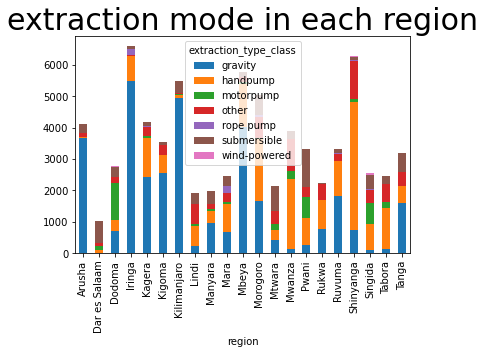

<Figure size 288x288 with 0 Axes>

In [65]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.extraction_type_class)

#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("extraction mode in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Plot above shows region and most used mode of extraction on the water pumps



<Figure size 2160x1800 with 0 Axes>

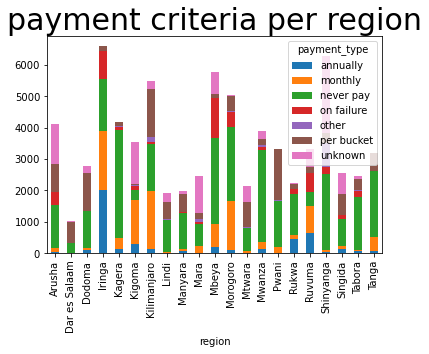

<Figure size 288x288 with 0 Axes>

In [66]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.payment_type)

#creating a bar plot
plt.figure(figsize=(30,25))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("payment criteria per region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Plot above shows how pple pay for their water ,we can see that in Dar es salaam and mtwara payment per backet is almost more common than never pay ,meaning its harder to get free water than all other places.

<Figure size 2448x2160 with 0 Axes>

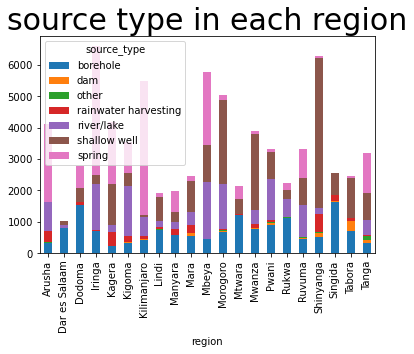

<Figure size 288x288 with 0 Axes>

In [67]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.source_type)

#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("source type in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Springs seem to be a commomn source across the regions followed by shallow well and river/lake and boreholes.
The city Dar es salam seems to have very few water sources.

In [68]:
srt_1=df.sort_values('region',ascending=False)

In [69]:
srt_2=df.sort_values('management_group',ascending=False)

In [70]:
#df.sort_values('arrival_date_month',ascending=False)
#creating a crosstab 
crosstb=pd.crosstab(srt_1.region,srt_2.management_group)
#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("management group in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

ValueError: cannot reindex from a duplicate axis

Most pumps seem to be managed by the comunities that use them .

In [71]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,3/14/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,3/6/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2/25/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,1/28/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,7/13/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [72]:
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'status_group'],
      dtype='object')

In [73]:
# let's drop the status-group

df_status=df[['id', 'status_group']]
df_status.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [74]:
df_features=df[['id','amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'age', 'pop/year']]

KeyError: "['pop/year', 'age'] not in index"

In [75]:
df_features.head()

NameError: name 'df_features' is not defined

In [76]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])
  
df_status['status_group'].unique()

NameError: name 'preprocessing' is not defined

In [77]:
df_status.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Performing Feature Engineering

In [78]:
df=df_features
df.columns

NameError: name 'df_features' is not defined

In [79]:
# for df
df['water_/_person'] = df['amount_tsh'].replace({0:1}) / df['population'].replace({0:1})

We will then write a function to check for the cardinality of each feature(how many unique values there are in the feature)

In [80]:
def reverse_cardinality_check(n, df):

# this function will search the dataframe for features above the cardinality limit, 
# then create a dict from the results

  
  feature_list = []
  
  cardinality_value = []
  
  for _ in range(len(df.columns)):
    if len(df[df.columns[_]].value_counts()) > n:
      
      feature_list.append(df.columns[_])
      
      cardinality_value.append(len(df[df.columns[_]].value_counts()))
                               
        
  feature_dict = dict(zip(feature_list, cardinality_value))
  
  return feature_dict

We will then preview our high cardinality features

In [81]:
high_cardinality_feature_dict = reverse_cardinality_check(150, df)
high_cardinality_feature_dict

{'id': 74250,
 'date_recorded': 369,
 'funder': 2141,
 'gps_height': 2456,
 'installer': 2411,
 'longitude': 71870,
 'latitude': 71869,
 'wpt_name': 45684,
 'subvillage': 21426,
 'ward': 2098,
 'population': 1128,
 'scheme_name': 2869,
 'water_/_person': 2925}

We will create dataframes for our high and low cardinality features

In [82]:
# dataframe for high cardinality
high_cardinality_features = df[list(high_cardinality_feature_dict.keys())]
high_cardinality_features.columns

Index(['id', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'subvillage', 'ward', 'population',
       'scheme_name', 'water_/_person'],
      dtype='object')

In [83]:
# dataframe for low cardinality features
low_cardinality_features = df.drop(columns = list(high_cardinality_feature_dict.keys()))
low_cardinality_features.columns

Index(['amount_tsh', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

Let us now perform one hot encoding for each dataframe

In [84]:
# Encoding the numerical columns
one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
one_hot_encode.fit(low_cardinality_features)
low_cardinality_features = one_hot_encode.transform(low_cardinality_features)

ordinal_encode = ce.OrdinalEncoder()
ordinal_encode.fit(high_cardinality_features)
high_cardinality_features = ordinal_encode.transform(high_cardinality_features)

NameError: name 'ce' is not defined

In [85]:
high_cardinality_features.isnull().sum()

id                0
date_recorded     0
funder            0
gps_height        0
installer         0
longitude         0
latitude          0
wpt_name          0
subvillage        0
ward              0
population        0
scheme_name       0
water_/_person    0
dtype: int64

Let's merge the two encoded features back together

In [86]:
# features = low_cardinality_features.concat(high_cardinality_features,on = low_cardinality_features.index)
frames =[low_cardinality_features, high_cardinality_features]

features = pd.concat(frames, axis = 1)

In [87]:
# previewing the datatset
features.head()

,amount_tsh,num_private,basin,region,region_code,district_code,lga,public_meeting,recorded_by,scheme_management,...,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,population,scheme_name,water_/_person
0,6000.0,0,Lake Nyasa,Iringa,11,5,Ludewa,True,GeoData Consultants Ltd,VWC,...,1390,Roman,34.938093,-9.856322,none,Mnyusi B,Mundindi,109,Roman,55.045872
1,0.0,0,Lake Victoria,Mara,20,2,Serengeti,No Record,GeoData Consultants Ltd,Other,...,1399,GRUMETI,34.698766,-2.147466,Zahanati,Nyamara,Natta,280,No Record,0.003571
2,25.0,0,Pangani,Manyara,21,4,Simanjiro,True,GeoData Consultants Ltd,VWC,...,686,World vision,37.460664,-3.821329,Kwa Mahundi,Majengo,Ngorika,250,Nyumba ya mungu pipe scheme,0.100000
3,0.0,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,True,GeoData Consultants Ltd,VWC,...,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Mahakamani,Nanyumbu,58,No Record,0.017241
4,0.0,0,Lake Victoria,Kagera,18,1,Karagwe,True,GeoData Consultants Ltd,No Record,...,0,Artisan,31.130847,-1.825359,Shuleni,Kyanyamisa,Nyakasimbi,0,No Record,1.000000


Next we impute and scale our features

In [88]:
#Merging df_status and features
df_1 = df_status.merge(features, left_on='id', right_on='id')
df_1.head()


,id,status_group_x,amount_tsh,num_private,basin,region,region_code,district_code,lga,public_meeting,...,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,population,scheme_name,water_/_person
0,69572,functional,6000.0,0,Lake Nyasa,Iringa,11,5,Ludewa,True,...,1390,Roman,34.938093,-9.856322,none,Mnyusi B,Mundindi,109,Roman,55.045872
1,8776,functional,0.0,0,Lake Victoria,Mara,20,2,Serengeti,No Record,...,1399,GRUMETI,34.698766,-2.147466,Zahanati,Nyamara,Natta,280,No Record,0.003571
2,34310,functional,25.0,0,Pangani,Manyara,21,4,Simanjiro,True,...,686,World vision,37.460664,-3.821329,Kwa Mahundi,Majengo,Ngorika,250,Nyumba ya mungu pipe scheme,0.100000
3,67743,non functional,0.0,0,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,True,...,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Mahakamani,Nanyumbu,58,No Record,0.017241
4,19728,functional,0.0,0,Lake Victoria,Kagera,18,1,Karagwe,True,...,0,Artisan,31.130847,-1.825359,Shuleni,Kyanyamisa,Nyakasimbi,0,No Record,1.000000


## c)Geo-Visualiziation of the pumps


In [89]:
# let's make our imports
rcParams['figure.figsize'] = 30, 20

# let's visualize the data
gdf = geopandas.GeoDataFrame(df_1, geometry=geopandas.points_from_xy(df_1.longitude, df_1.latitude))

functional = gdf.where(gdf['status_group'] == 0)
repair = gdf.where(gdf['status_group'] == 2)
abandoned = gdf.where(gdf['status_group'] == 1)
broken = gdf.where(gdf['status_group'] == 3)



world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='gray', edgecolor='black')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=3)

ax.scatter(repair['longitude'], repair['latitude'],
           c='blue', alpha=.5, s=5)

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=5)
plt.title("Map of Pump Distributions, Green-Functional, Blue-Repair, Red-Broken", fontsize = 25)

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

NameError: name 'rcParams' is not defined

In [90]:
# # visualizing the target variable
# # print(train_labels["status_group"].unique())
# rcParams['figure.figsize'] = 10, 8
# imb = sns.countplot(df_1['status_group'],order = df_1['status_group'].value_counts().index)

**Observation**

There is class imbalance. A class imbalance is said to exist when observation in one class is higher than the observation in other classes. This is a common problem especially in classification problems because Imbalanced data can interfere with our model accuracy. Training the model using the dataset as is would make it get a high accuracy score just by predicting the majority class, but it would fail to capture the minority class, which is the point of creating the model in the first place.

### Random Sampling
* Let's address the class imbalance issue discovered during EDA by either adding more copies to the minority classes(Oversampling) or removing some observations of the majority class until the majority and minority classes are balanced out.

* The two sampling strategies we have to consider

> random under-sampling

> random over-sampling (this is what we'll use)

**Justification**

* It's important to note that undersampling can cost us valuable information, therefore after comparing pros and cons of both under and over sampling we concluded that oversampling was best suited for modeling given the size of the dataset.

* Oversampling is said to be a good choice when you don’t have a ton of data to work with(as is our case).Undersampling is better suited for big data. Another con to consider when undersampling is that it can cause overfitting and poor generalization to our test set.

## d) SMOTE for Balancing Data

In [91]:
# Dropping the Point column (Geometry) to enable us pass SMOTE
# df_1 = df_1.drop(columns='geometry')

In [92]:
# Oversample and plot imbalanced dataset with SMOTE
# let's select our x and y variables
X = df_1.drop('status_group', axis = 1).astype(np.float64)
y = df_1['status_group']
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

KeyError: "['status_group'] not found in axis"

Our dataset is now balanced and ready for Modelling. All classes are equally distributed at 25%.

# Modelling

## Decision Tree Classifier

In [93]:
# let's import decision trees classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)
print(predicted_value)
#%%
tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        zeroes +=1
    else:
        ones +=1
      
print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*2 + (ones/70)*2)
print("Gini :-",val)
 
match = 0
UnMatch = 0
 
for i in range(30):
    if predicted_value[i] == y_test[i]:
        match += 1
    else:
        UnMatch += 1
         
accuracy = match/30
print("Accuracy is: ",accuracy)

NameError: name 'train_test_split' is not defined

Gini Index is a score that evaluates how accurate a split is among the classified groups. Gini index evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. The gini score attained implies that the model is accurate with random distribution of values.

## XG BOOST Classifier

### Base Model

In [94]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# training XGboost on the training
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

NameError: name 'train_test_split' is not defined

In [95]:
# Making the Confusion Matrix
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

NameError: name 'classifier' is not defined

Using XGB Classifier, we get an accuracy score of 80.6% cassifying the 4 labels. In next step, we will apply cross validaton to improve our model.

### Cross Validation
>Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [96]:
# applying K-fold cross validation 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

NameError: name 'cross_val_score' is not defined

With Cross Validation, our model accuracy is 75.79% with a error standard deviation of 0.33%. We will do hyperparameter tuning now to further improve our model

### HyperParameter Tuning
> Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

* Hyperparameters are certain values or weights that determine the learning process of an algorithm.

* XGBoost provides large range of hyperparameters. We can leverage the maximum power of XGBoost by tuning its hyperparameters.

* The most powerful ML algorithm like XGBoost is famous for picking up patterns and regularities in the data by automatically tuning thousands of learnable parameters.

* In tree-based models, like XGBoost the learnable parameters are the choice of decision variables at each node.

* XGBoost is a very powerful algorithm. So, it will have more design decisions and hence large hyperparameters. These are parameters specified by hand to the algo and fixed throughout a training phase.

* In tree-based models, hyperparameters include things like the maximum depth of the tree, the number of trees to grow, the number of variables to consider when building each tree, the minimum number of samples on a leaf and the fraction of observations used to build a tree.

* Generally, the XGBoost hyperparameters have been divided into 4 categories. They are as follows -

    1. General parameters

    2. Booster parameters

    3. Learning task parameters

    4. Command line parameters
* Before running a XGBoost model, we must set three types of parameters - general parameters, booster parameters and task parameters.

* The fourth type of parameters are command line parameters. They are only used in the console version of XGBoost. So, we will skip these parameters and limit our model to the first three type of parameters.


#### Bayesian Optimization with HYPEROPT

* Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

* Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

* In this process, we train the model with various possible range of parameters until a best fit model is obtained.

* Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.
* In this model, we will use Bayesian Optimization with HYPEROPT
* HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

* Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

In [97]:
# Initialize domain space for range of values
space={'max_depth': hp.quniform("max_depth", 0, 18, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'reg_alpha' : hp.quniform('reg_alpha', 0,10,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,10),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 100,
        'seed': 0
    }

NameError: name 'hp' is not defined

In [98]:
# Objective function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="mlogloss",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

NameError: name 'train_test_split' is not defined

In [99]:
# Optimization algorithm 
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

NameError: name 'Trials' is not defined

* Here best_hyperparams gives us the optimal parameters that best fit model and better loss function value.

* trials is an object that contains or stores all the relevant information such as hyperparameter, loss-functions for each set of parameters that the model has been trained.

* ‘fmin’ is an optimization function that minimizes the loss function and takes in 4 inputs - fn, space, algo and max_evals.

* Algorithm used is tpe.suggest.

With tuned parameters, we get an accuracy of 59%

In [100]:
# Results
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  



NameError: name 'best_hyperparams' is not defined

> The above result give best set of hyperparameters.

### Tuned Model

In [101]:
# Tuned Model
tuned_model = xgb.XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)
    
# Lets fit the model
htuned_model = tuned_model.fit(X_train, y_train, verbose=False)

# Lets make predictions using the test dataset
tuned_predictions = htuned_model.predict(X_test)
 
# Lets check for accuracy
accuracy = accuracy_score(tuned_predictions,y_test)
accuracy

NameError: name 'xgb' is not defined

In [102]:
# Calculating F1 Scores, precision & recall
precision = precision_recall_fscore_support(y_test, tuned_predictions, average='weighted')
precision

NameError: name 'precision_recall_fscore_support' is not defined